# Reading Simulation Data 

In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import src.trainers as tr
import src.read_pic as rp
import os
# Fields to read.
fields_to_read={"B":True,"B_ext":False,"divB":True,"E":True,"E_ext":False,"rho":True,"J":True,
                "P":True,"PI":False,"Heat_flux":False,"N":False,"Qrem":False}
# Path of the folder containing the .h5 files to read.
files_path="/lustre1/project/stg_00032/share_dir/SW/data_small/" #"/lustre1/project/stg_00032/share_dir/brecht/" # "/users/cpa/francesc/share_dir/SW/data_small/" #"/users/cpa/francesc/share_dir/jincai/dat_FF2D07e/" #="/users/cpa/francesc/share_dir/nn/data/raw_data/"
experiments = [f.name for f in os.scandir(files_path) if f.is_dir()]
print(f"{experiments = }")

experiments = ['run']


In [4]:
data, X, Y, qom = rp.get_experiments(experiments, files_path, fields_to_read, choose_species=['e','i'], verbose=True)

INFO:src.read_pic:loading B
INFO:src.read_pic:loading E
INFO:src.read_pic:loading divB
INFO:src.read_pic:loading rho
INFO:src.read_pic:loading J
INFO:src.read_pic:loading P and/or PI
ERROR:src.read_pic:Failed to read Pyx_0 from Medium_Box_02-Fields_000001.h5 using path /lustre1/project/stg_00032/share_dir/SW/data_small/run/
INFO:src.read_pic:Component Pyx for species e missing because tensor is symmetric
ERROR:src.read_pic:Failed to read Pyx_1 from Medium_Box_02-Fields_000001.h5 using path /lustre1/project/stg_00032/share_dir/SW/data_small/run/
INFO:src.read_pic:Component Pyx for species i missing because tensor is symmetric
ERROR:src.read_pic:Failed to read Pzx_0 from Medium_Box_02-Fields_000001.h5 using path /lustre1/project/stg_00032/share_dir/SW/data_small/run/
INFO:src.read_pic:Component Pzx for species e missing because tensor is symmetric
ERROR:src.read_pic:Failed to read Pzx_1 from Medium_Box_02-Fields_000001.h5 using path /lustre1/project/stg_00032/share_dir/SW/data_small/run/

In [10]:
data['run']['Bx'].shape, data['run']['rho']['e'].shape, data['run']['rho']['i'].shape

((512, 512, 30), (512, 512, 30), (512, 512, 30))

# Data Manip
# Plotting Data

Now we know how the data looks so we can extract a portion in space but all times

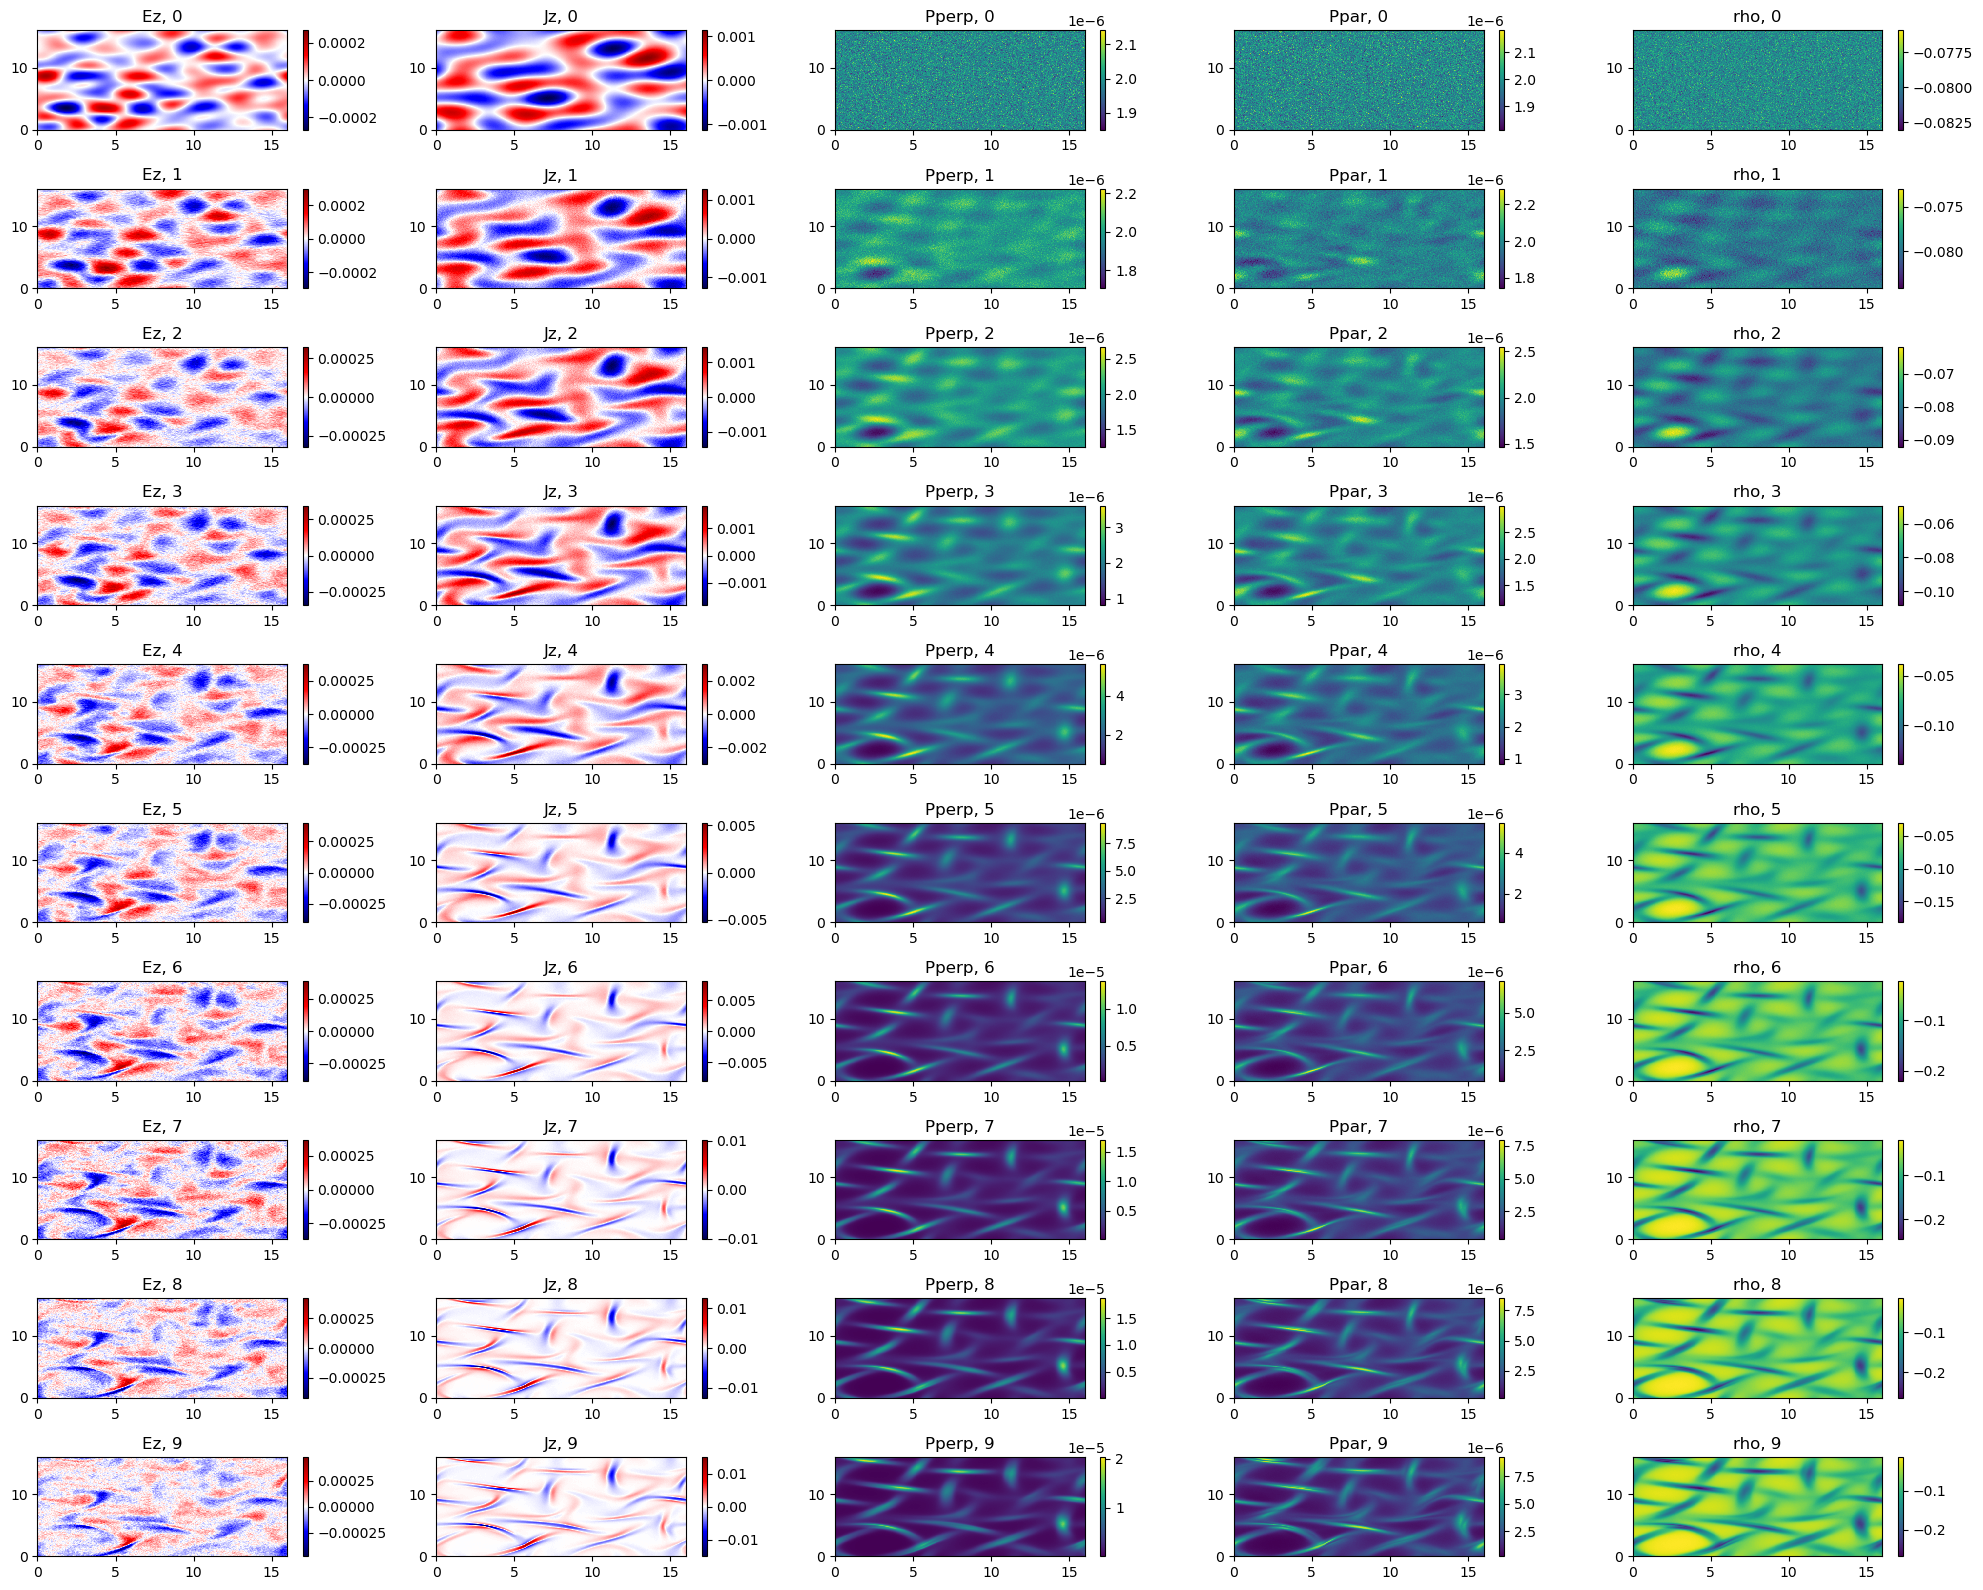

In [7]:
import matplotlib.pyplot as plt
experiment = 'run'

fig, axes = plt.subplots(10, 5, figsize=(20, 16))
for i in range(10):
    for j, field in enumerate(['Ez', 'Jz', 'Pperp', 'Ppar', 'rho']):
        cmap = 'seismic' if field == 'Ez' or field == 'Jz' else 'viridis'
        vmin, vmax = None, None
        if field == 'Jz':
            vmax = max([data[experiment][field]['e'][...,i].max(), -data[experiment][field]['e'][...,i].min()])
            vmin = -vmax
        if field == 'Ez':
            vmax = max([data[experiment][field][...,i].max(), -data[experiment][field][...,i].min()])
            vmin = -vmax
            im = axes[i,j].pcolormesh(X, Y, data[experiment]['Ez'][...,i],cmap=cmap,vmax=vmax,vmin=vmin)
        else:
            im = axes[i,j].pcolormesh(X, Y, data[experiment][field]['e'][...,i], cmap=cmap, vmax=vmax, vmin=vmin)
        axes[i,j].set_title(f"{field}, {i}")
        fig.colorbar(im,ax=axes[i,j])
plt.tight_layout()
plt.show()
